<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-02-02-Decision_Tree/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notes](https://1drv.ms/u/s!AmSu_rSXl5m3iTEdiabV6_MYBrJL?e=gWkw4t)

In [8]:
import plotly.express as px
import numpy as np
import pandas as pd

In [9]:
iris = px.data.iris()
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
59,5.2,2.7,3.9,1.4,versicolor,2
82,5.8,2.7,3.9,1.2,versicolor,2
147,6.5,3.0,5.2,2.0,virginica,3
128,6.4,2.8,5.6,2.1,virginica,3
98,5.1,2.5,3.0,1.1,versicolor,2


In [10]:
px.scatter(iris, x = 'petal_length', color = 'species_id')

In [11]:
px.scatter(iris, x = 'sepal_length', color = 'species_id')

# Even Odd

In [12]:
import matplotlib.pyplot as plt

x = np.arange(6)
y = x%2

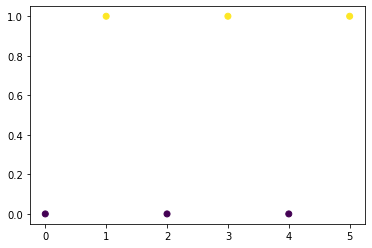

In [13]:
plt.scatter(x, y, c = y)

In [14]:
X = x.reshape(-1, 1)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [16]:
model.predict([[100], [101]])

array([1, 1], dtype=int32)

In [17]:
model.score(X, y)

1.0

In [18]:
from sklearn import tree

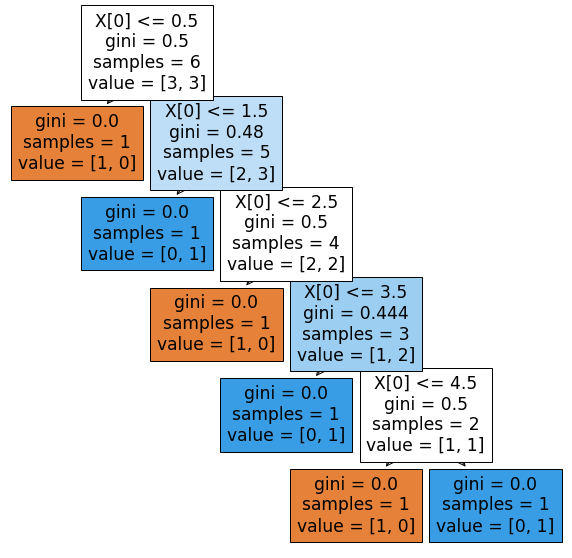

In [19]:
plt.figure(figsize = (10, 10))

tree.plot_tree(model, filled = True)
plt.show()

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/sjwhitworth/golearn/master/examples/datasets/tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Entropy Gini

In [21]:
x1 = np.linspace(0, 1, 15)
x2 = 1-x1

ye = -x1*np.log2(x1) - x2*np.log2(x2)
yg = 1 - (x1*x1 + x2*x2)

ye[0] = 0  # p(x1) = 0
ye[-1] = 0 # p(x2) = 0

C:\Users\shank\AppData\Local\Temp/ipykernel_15552/127446564.py:4: RuntimeWarning:

divide by zero encountered in log2

C:\Users\shank\AppData\Local\Temp/ipykernel_15552/127446564.py:4: RuntimeWarning:

invalid value encountered in multiply



In [35]:
x1 = np.linspace(0.1, 0.9, 15)
x2 = 1-x1

ye = -x1*np.log2(x1) - x2*np.log2(x2)
# yg = 1 - (x1*x1 + x2*x2)

# ye[0] = 0  # p(x1) = 0
# ye[-1] = 0 # p(x2) = 0

# plt.plot(x1,x2)
# plt.scatter(x1,x2)
# plt.scatter(x1,ye)
# plt.plot(x1)
ye

array([0.46899559, 0.62743034, 0.74959526, 0.84350709, 0.91346015,
       0.96197806, 0.9905577 , 1.        , 0.9905577 , 0.96197806,
       0.91346015, 0.84350709, 0.74959526, 0.62743034, 0.46899559])

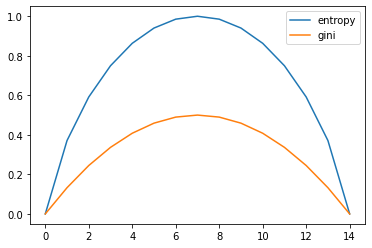

In [22]:
plt.plot(ye, label = 'entropy')
plt.plot(yg, label = 'gini')
plt.legend()

In [23]:
a = 5/14
b = 1 - a

-a*np.log2(a) -b*np.log2(b)

0.9402859586706311

# Scratch

In [24]:
df = pd.read_csv('/content/play_tennis.csv')
df.drop('day', axis = 1, inplace = True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/play_tennis.csv'

In [ ]:
X = df.drop('play', axis = 1)
Y = df['play']

In [ ]:
np.full(10, 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
for i, (_, x) in enumerate(X.iterrows()):
    print(x)
    print()

In [ ]:
class Node():
    def __init__(self):
        pass
    
    def gini(self, X, Y):
        return 1-(Y.value_counts(normalize=True)**2).sum()

    def fit(self, X, Y):
        self.dummy_label = Y.iloc[0]
        self.label_dtype = Y.dtype

        H = self.gini(X, Y)

        if H == 0:
            self.typ = 'pure'
            self.ans = Y.iloc[0]
            return
        else:
            maxIG = 0
            maxfet = ''
            for col in X.columns:
                wimpurity = 0
                for val in X[col].unique():
                    ind = X[col] == val
                    nx = X[ ind ]
                    ny = Y[ ind ]

                    wimpurity += nx.shape[0] * self.gini(nx, ny) / X.shape[0]
                IG = H - wimpurity
                if IG > maxIG:
                    maxIG = IG
                    maxfet = col
            
            self.typ = 'decision'
            self.fet = maxfet
            self.decision = {}
            for val in X[maxfet].unique():
                node = Node()
                self.decision[val] = node
                ind = X[self.fet] == val
                nx = X[ ind ]
                ny = Y[ ind ]
                node.fit(nx, ny)
    
    def pred(self, x):
        if self.typ == 'pure':
            return self.ans
        else:
            val = x[self.fet]
            return self.decision[val].pred(x)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.dummy_label, dtype = self.label_dtype)

        for i, (_, x) in enumerate(X.iterrows()):
            lab = self.pred(x)
            y_pred[i] = lab
        
        return y_pred

In [ ]:
model = Node()
model.fit(X, Y)

In [ ]:
from sklearn.metrics import accuracy_score

# print(Y.values)
# print(model.predict(X))
accuracy_score(Y, model.predict(X))

1.0

# Regression

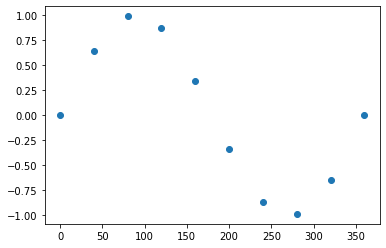

In [ ]:
x = np.linspace(0, 360, 10)
y = np.sin( np.deg2rad(x) )

plt.scatter(x, y)

In [ ]:
X = x.reshape(-1, 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X, y)

DecisionTreeRegressor()

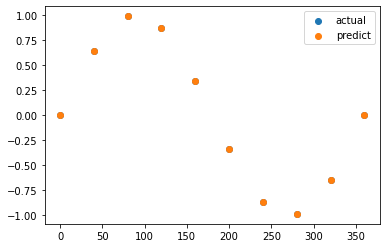

In [ ]:
plt.scatter(x, y, label = 'actual')
plt.scatter(x, reg.predict(X), label = 'predict')

plt.legend()

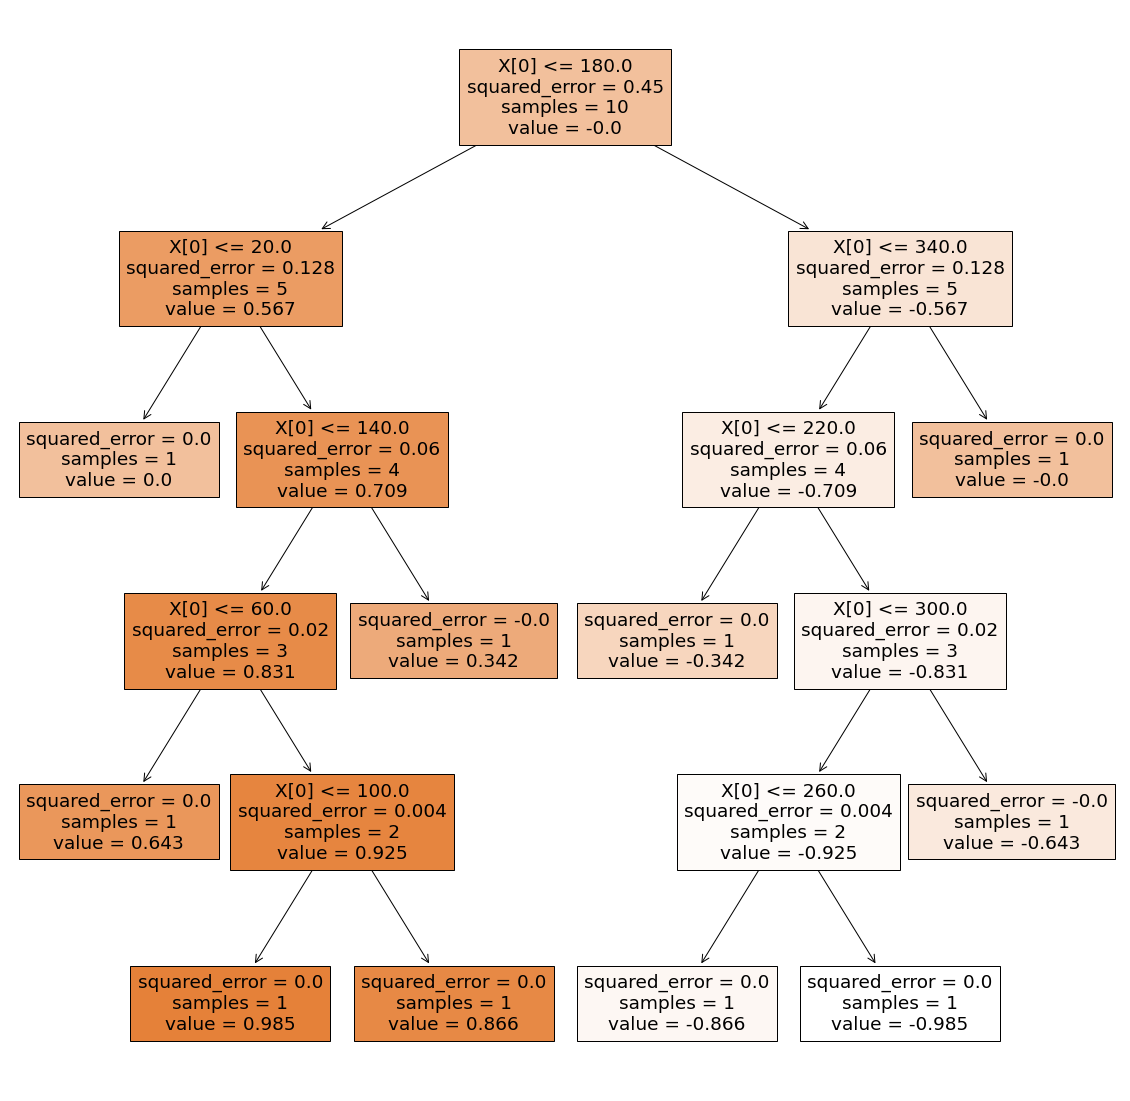

In [ ]:
from sklearn import tree

plt.figure(figsize = (20, 20))
tree.plot_tree(reg, filled = True)
plt.show()

depth 3


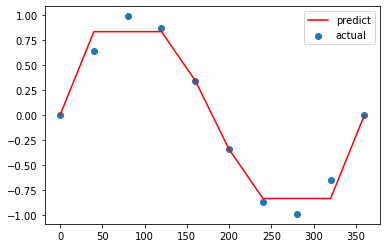

In [ ]:
reg = DecisionTreeRegressor(max_depth = 3)

reg.fit(X, y)

print('depth', reg.get_depth())

plt.scatter(x, y, label = 'actual')
plt.plot(x, reg.predict(X), label = 'predict', color = 'r')

plt.legend()